# CLUSTERING CAPSTONE PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename(columns={"Genre":"Gender"},inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.rename(columns={"Annual Income (k$)":"Income",
                 "Spending Score (1-100)" :"Score"}, inplace=True)

In [6]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [7]:
df.drop(columns=["CustomerID","Gender","Age"],inplace=True)

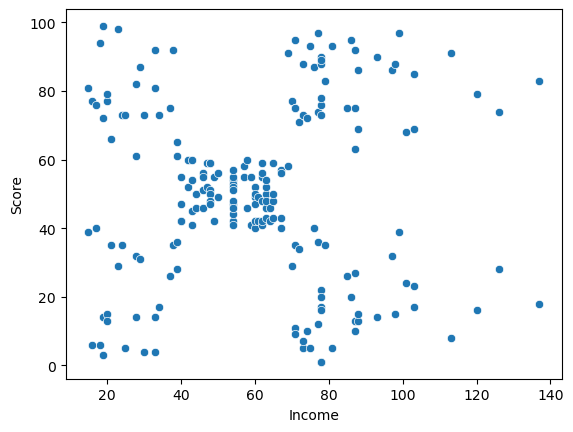

In [8]:
sns.scatterplot(x="Income",y="Score",data=df)
plt.show()

**for unsupervised manchine learning,there is no output variable**

In [9]:

X = df


In [16]:
X

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# 1.KMEANS CLUSTRING

**find the optimal number of clusters: Elbow curve**


In [17]:
wcss = []

for k in range(1,11):
    from sklearn.cluster import KMeans
    Kmeans = KMeans(n_clusters = k,init = 'k-means++')
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
                
print(wcss)

[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948836, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21794.8856090982, 19794.559507517573]


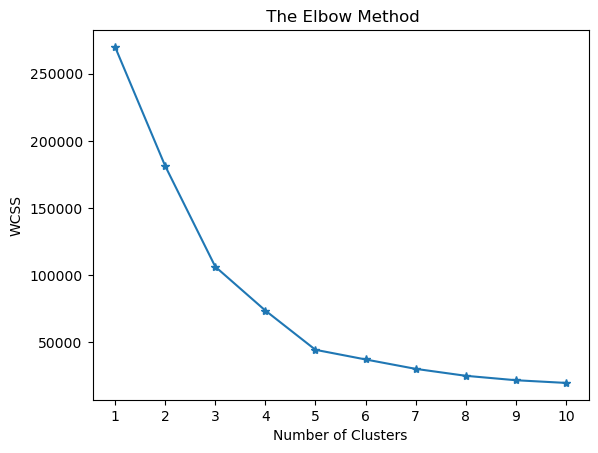

In [20]:
#using the elbow method
plt.plot(range(1,11), wcss , marker="*")
plt.xticks(range(1,11))
plt.title(' The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()


In [21]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = True)

#fit & predict

X["km_cluster"] = Kmeans.fit_predict(X)

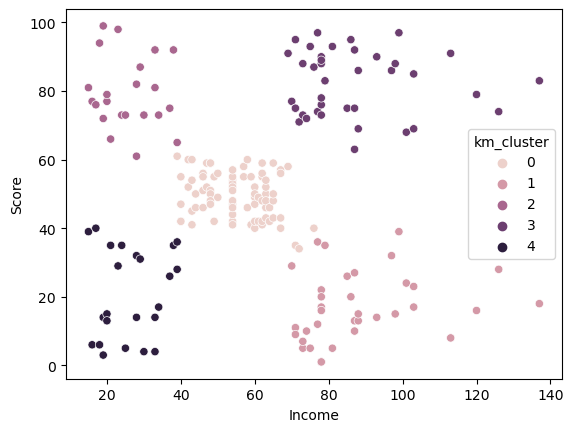

In [23]:
sns.scatterplot(x="Income",y="Score",hue="km_cluster",data=X)
plt.show()

**Clustering-Observation**


• Cluster 0 : Average Income, Average Spending Score - Can target these set of customers by providing them with Low cost EMIs etc.
    

• Cluster 1 : High Income, Low Spending Score - Target these customers by asking the feedback and advertising the product in a better way.
    

• Cluster 2 : Low Income, High Spending Score - May or may not target these group of customers based on the policy of the mall.
    

• Cluster 3 : High Income, High Spending Score - **Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.**
    

• Cluster 4: Low Income, Low Spending Score - Don't target these customers since they have less income and need to save money.

# 2. HIERAECHICAL CLUSTERING

identifying the **optimal number of clusters** using **Dendrogram**

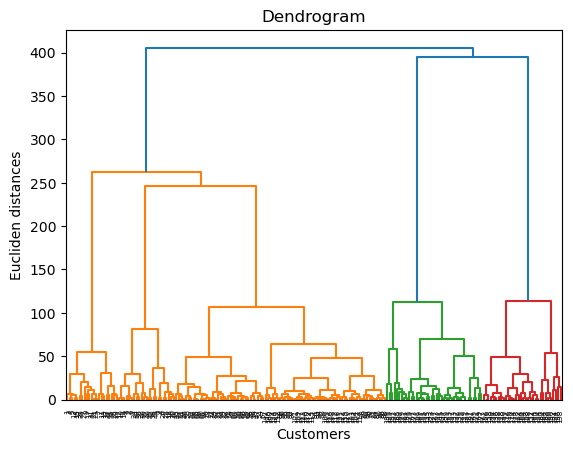

In [24]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(X, method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucliden distances')
plt.show()

**HIERARCHICAL CLUSTERING MODEL**

In [34]:
from sklearn.cluster import AgglomerativeClustering

hc =  AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
                             

#fit & predict
X["h_cluster"] = hc.fit_predict(X)

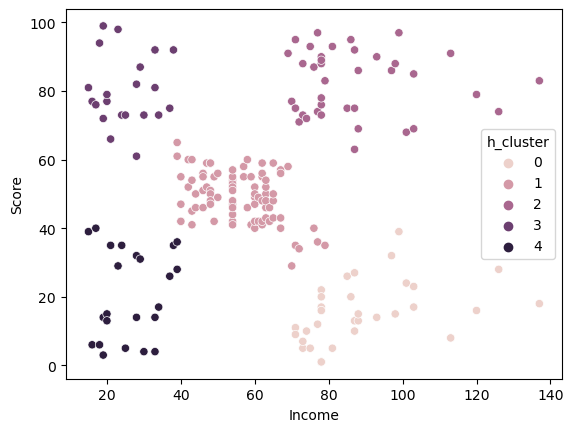

In [35]:
sns.scatterplot(x='Income',y='Score',hue='h_cluster',data=X)
plt.show()

# 3.DBSCAN CLUSTERING

In [37]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN(eps=r, min_samples=m)
        X["db_cluster"] = dbs.fit_predict(X)
        
    if X["db_cluster"].nunique()==5:
            break
            
print("eps:",r)
print("min:",m)

eps: 8
min: 9


In [38]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=8, min_samples=9)

X["db_cluster"] = dbs.fit_predict(X)

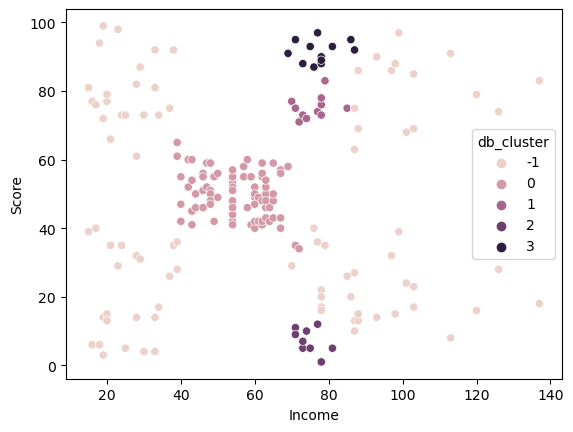

In [39]:
sns.scatterplot(x="Income",y="Score",hue="db_cluster",data=X)
plt.show()